# Results from the mortality prediction pipeline

## Read data files

In [1]:
import pickle

with open('data/cv_scores_seven_day.pickle', 'rb') as fp:
    sevenDayDict = pickle.load(fp)

with open('data/cv_scores_fourteen_day.pickle', 'rb') as fp:
    fourteenDayDict = pickle.load(fp)

with open('data/cv_scores_twentyone_day.pickle', 'rb') as fp:
    twentyoneDayDict = pickle.load(fp)

with open('data/cv_scores_twentyeight_day.pickle', 'rb') as fp:
    twentyeightDayDict = pickle.load(fp)

with open('data/cv_scores_sixty_day.pickle', 'rb') as fp:
    sixtyDayDict = pickle.load(fp)

with open('data/cv_scores_ninety_day.pickle', 'rb') as fp:
    ninetyDayDict = pickle.load(fp)

with open('data/cv_scores_onetwenty_day.pickle', 'rb') as fp:
    onetwentyDayDict = pickle.load(fp)

## Function to extract lists

In [2]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores

## Seven day mortality prediction

### Extract lists

In [3]:
labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores = getLists(sevenDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

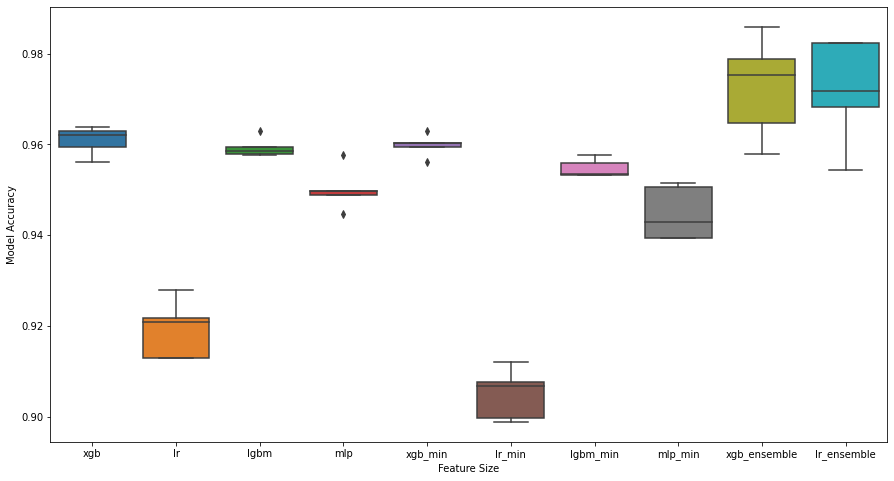

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

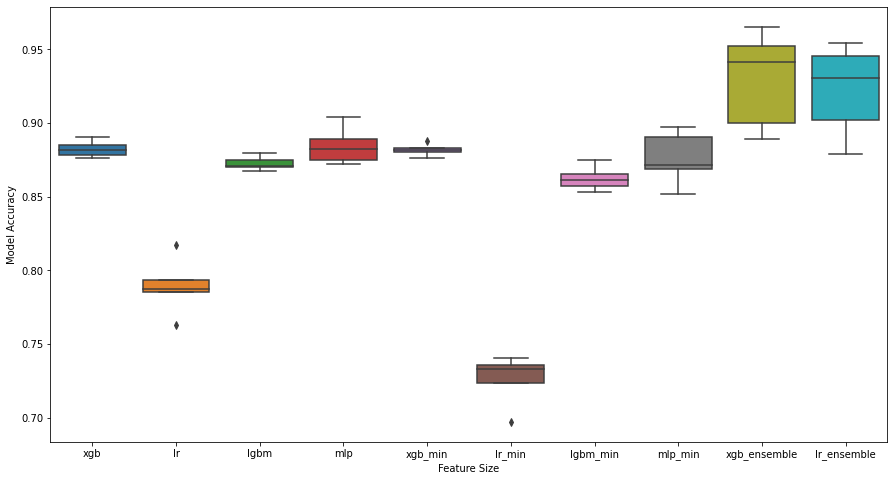

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

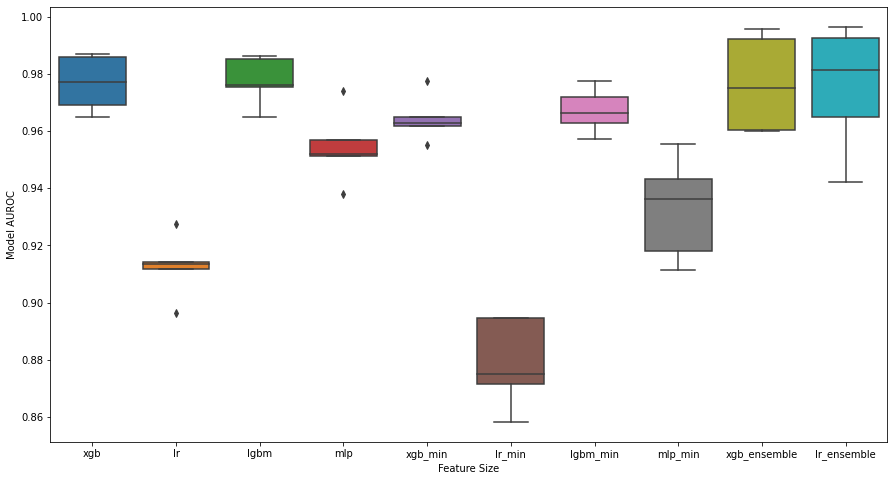

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

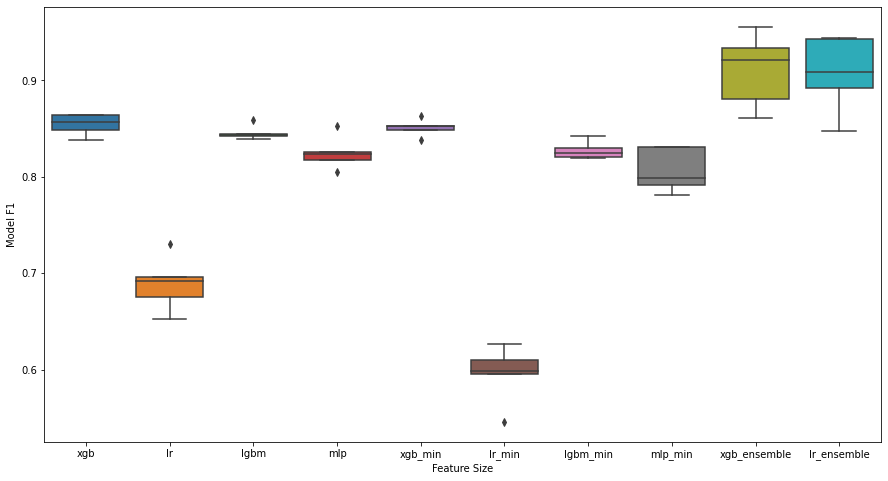

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Fourteen day mortality prediction

### Extract lists

In [8]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(fourteenDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

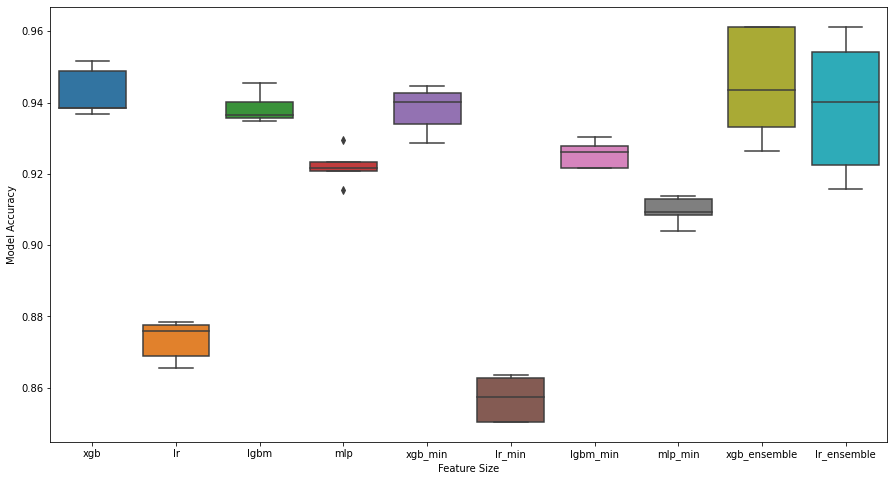

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

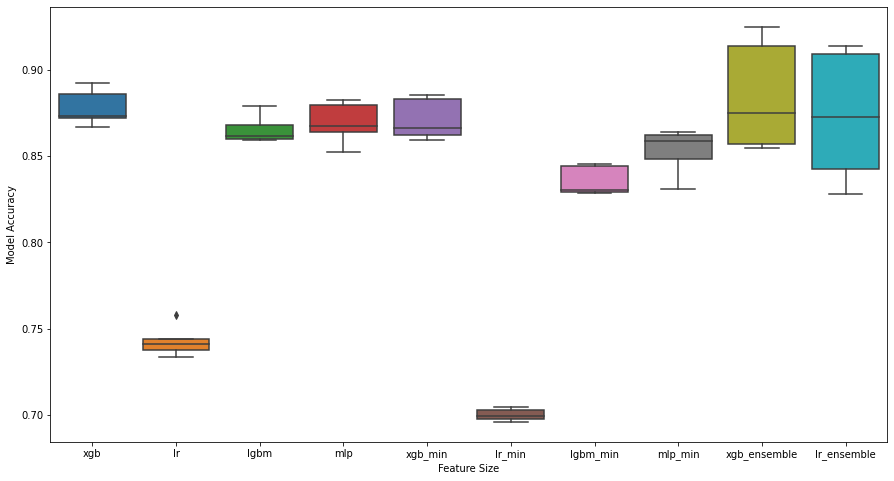

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

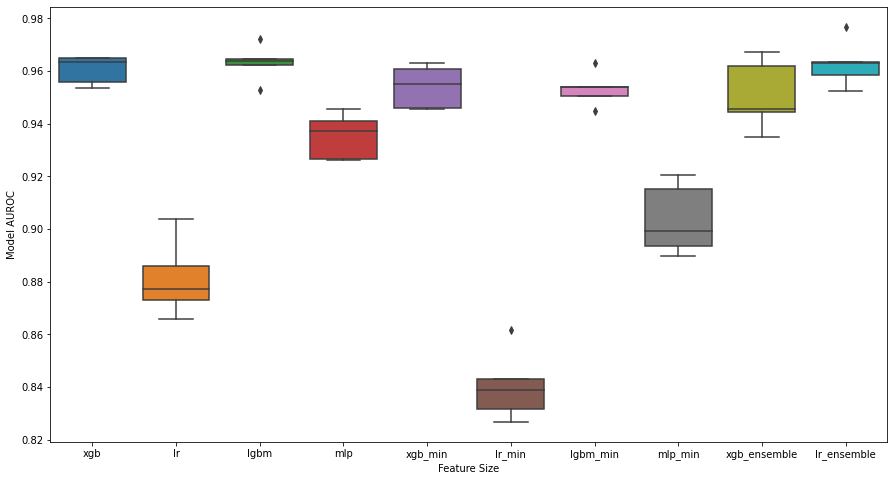

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

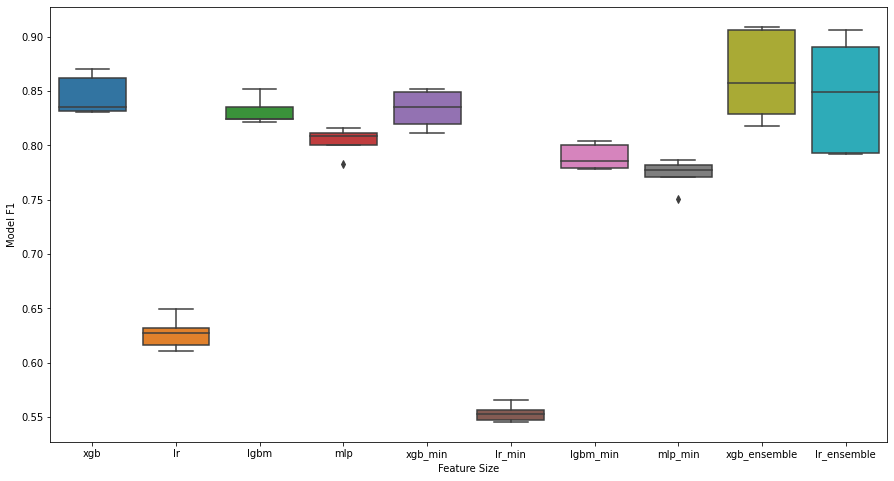

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Twentyone day mortality prediction

### Extract lists

In [13]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(twentyoneDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

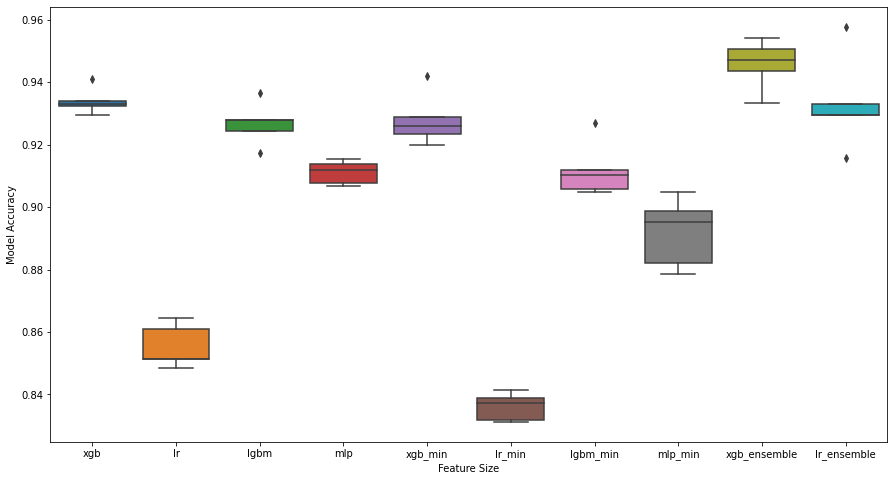

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

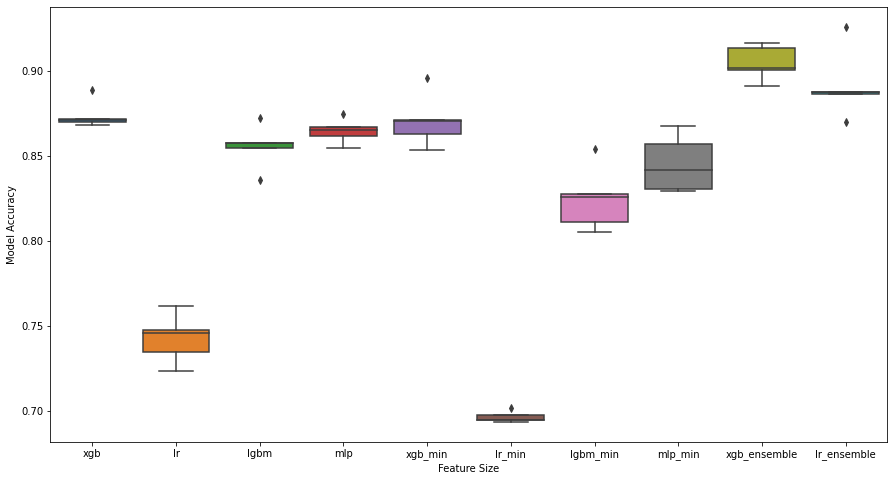

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

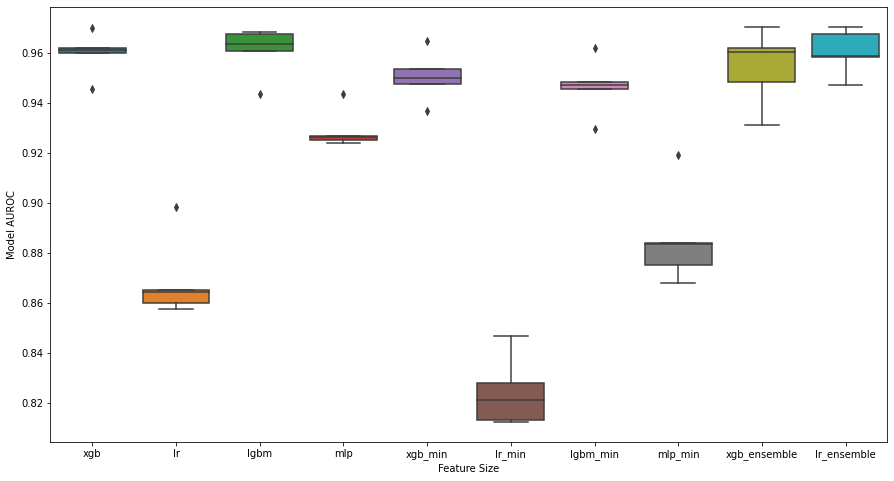

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

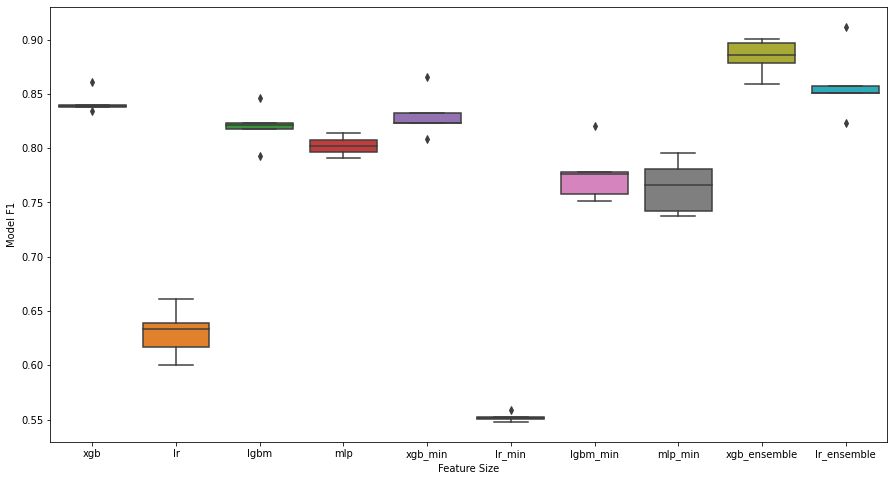

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Twentyeight day mortality prediction

### Extract lists

In [18]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(twentyeightDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

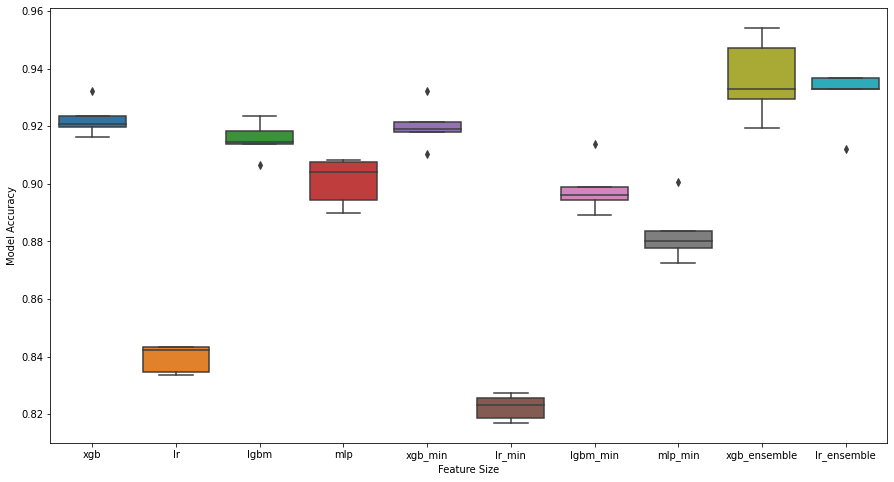

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

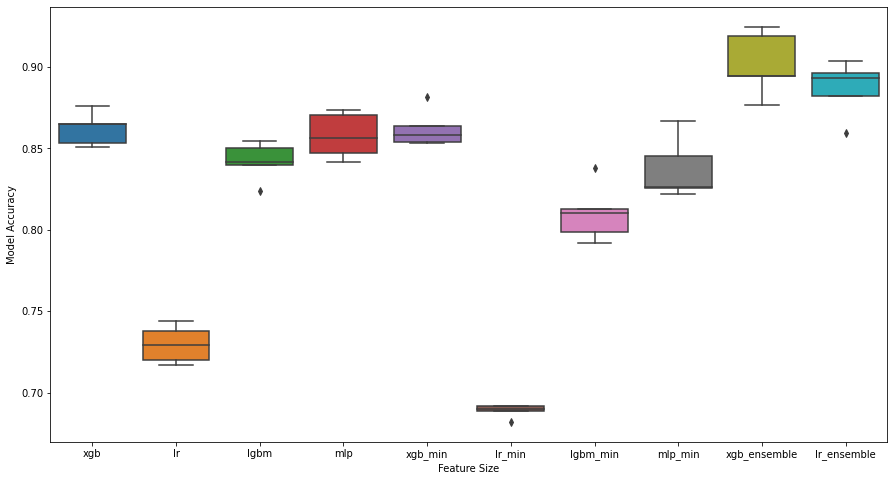

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

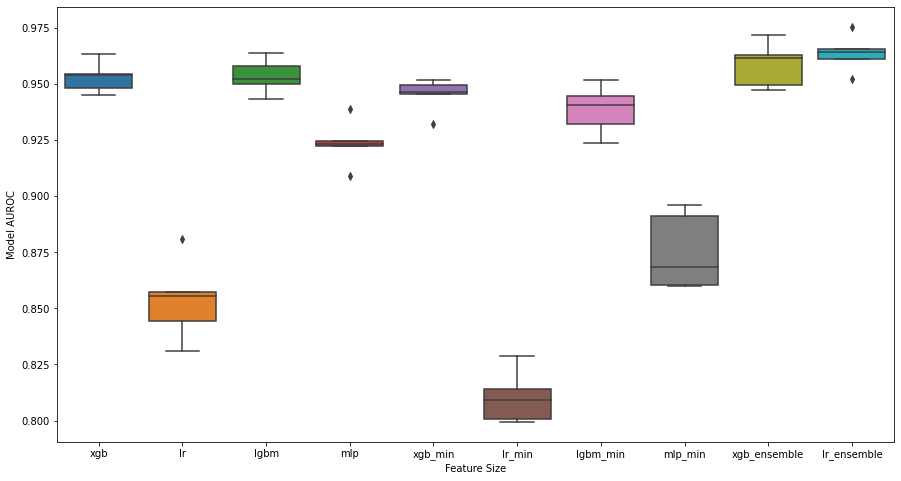

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

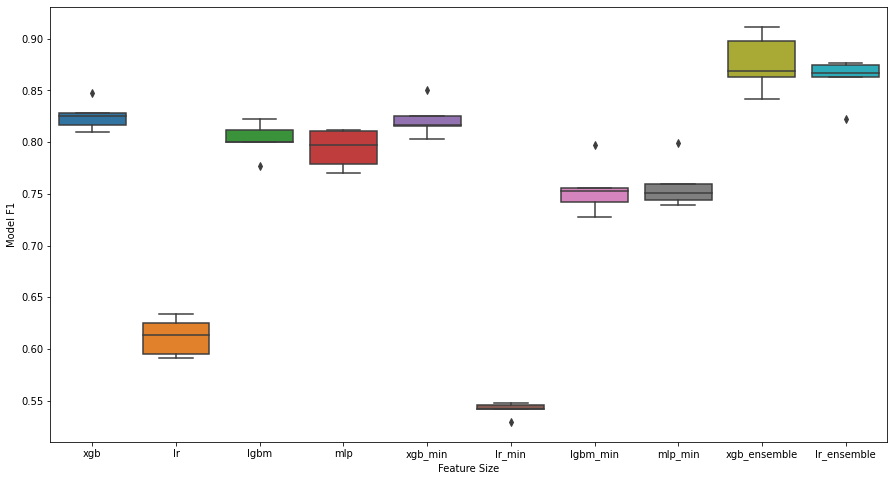

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Sixty day mortality prediction

### Extract lists

In [23]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(sixtyDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

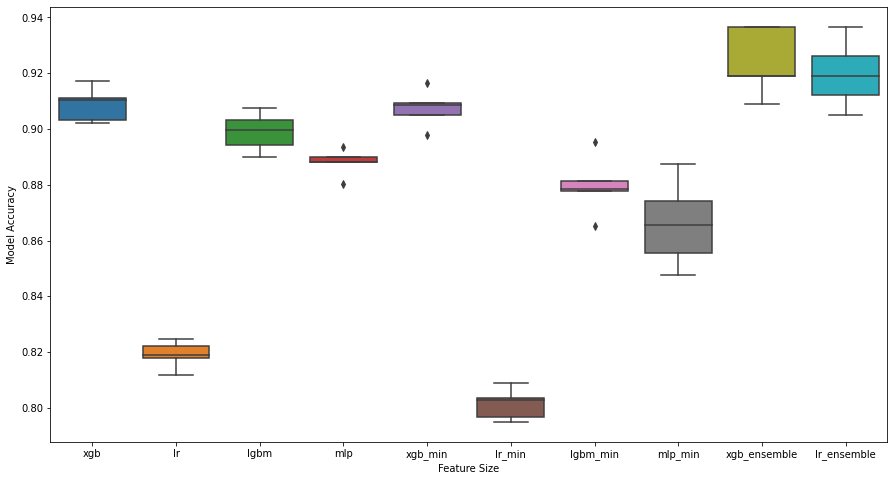

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

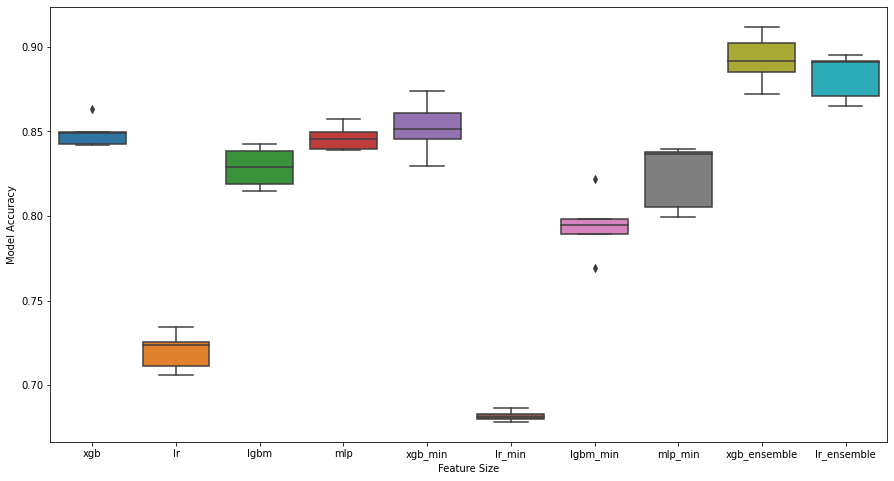

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

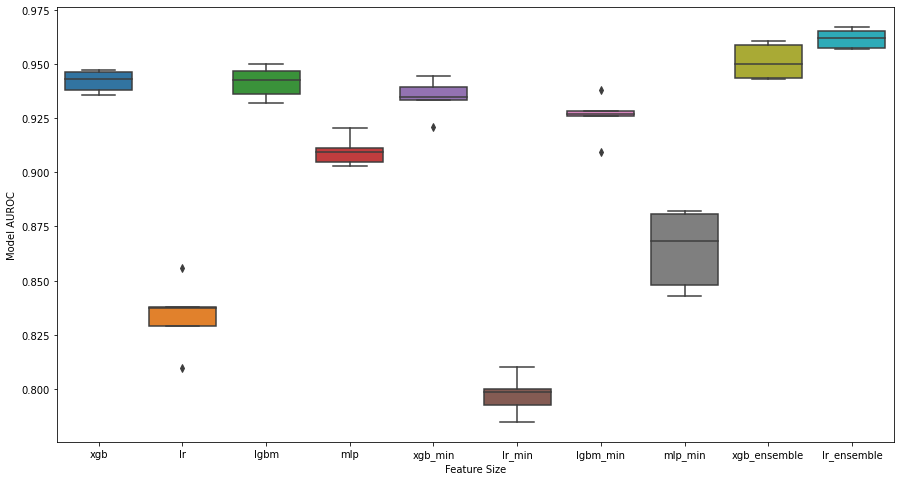

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

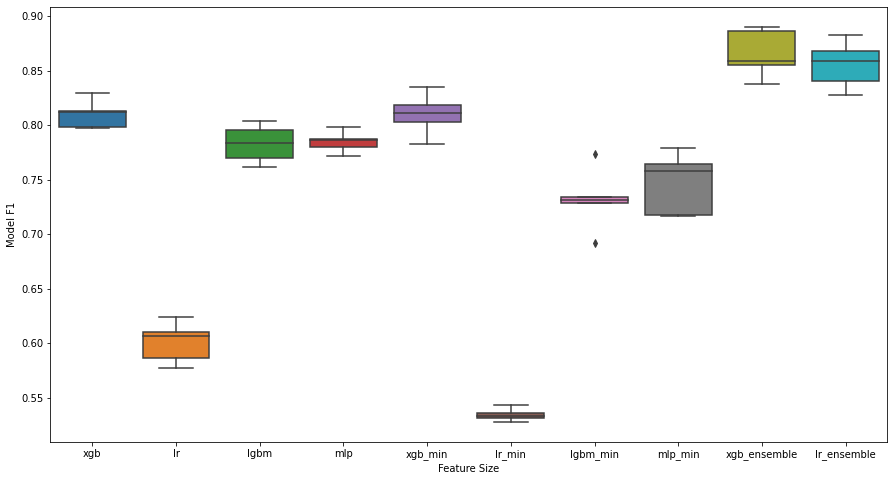

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Ninety day mortality prediction

### Extract lists

In [28]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(ninetyDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

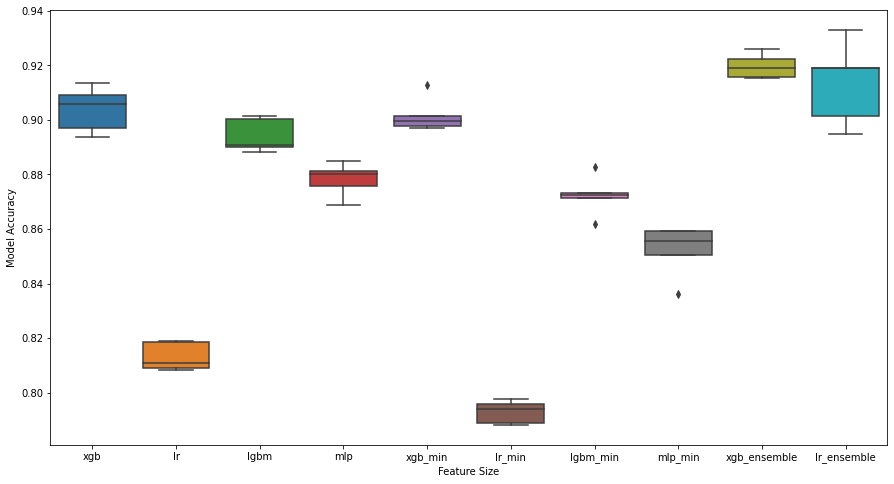

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

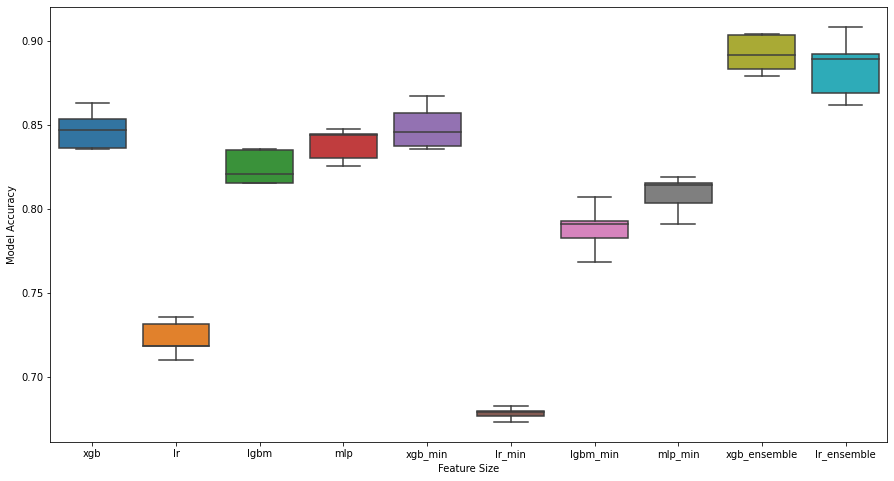

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

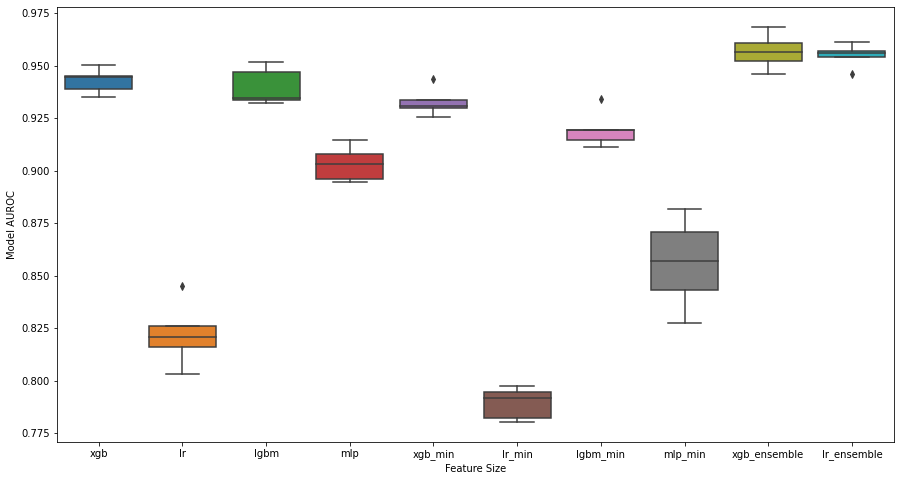

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

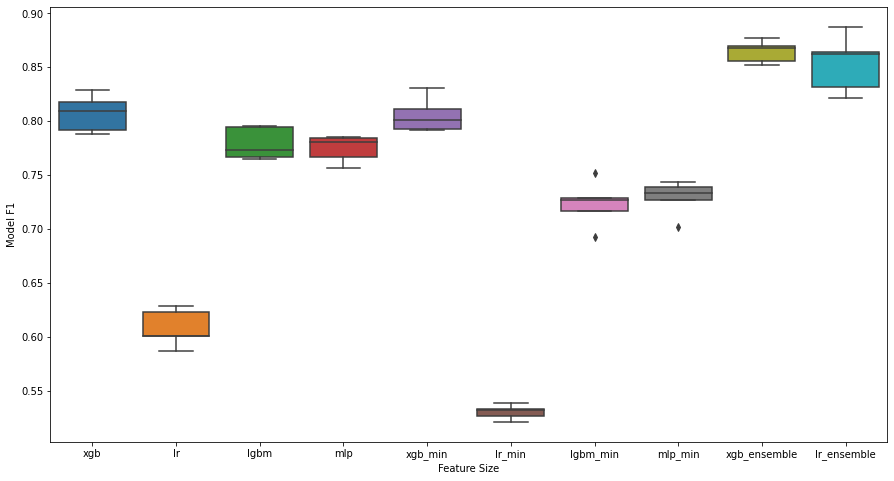

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Onetwenty day mortality prediction

### Extract lists

In [33]:
labels, accuracy_scores, balanced_accuracy_scores, f1_scores, roc_auc_scores = getLists(onetwentyDayDict)

### Plot accuracies

[Text(0, 0.5, 'Model Accuracy')]

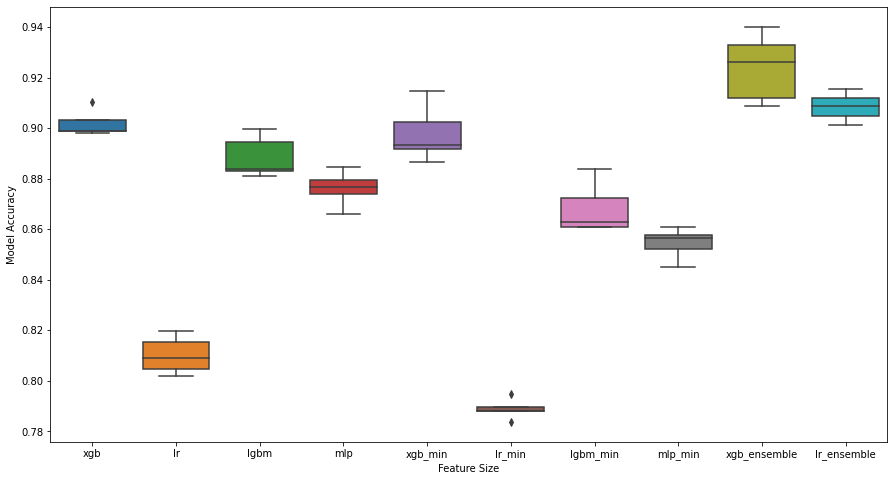

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot balanced accuracies

[Text(0, 0.5, 'Model Accuracy')]

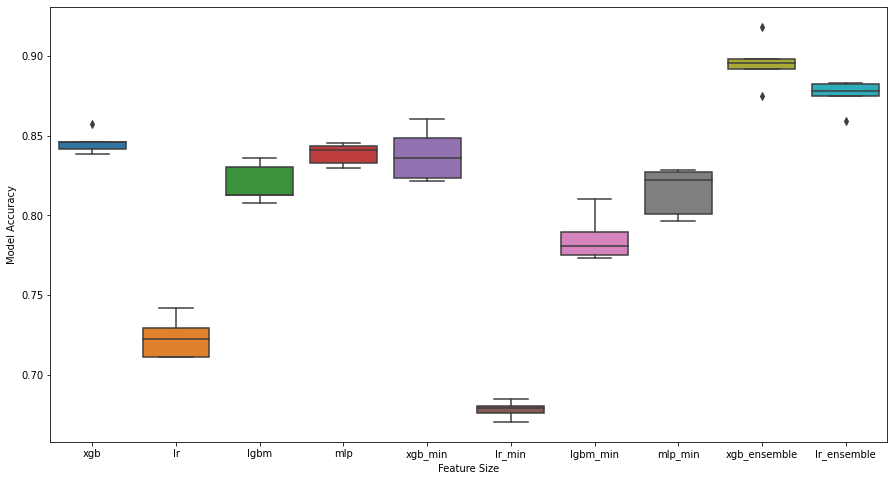

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=balanced_accuracy_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Average precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=average_precision_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model Accuracy')

### Plot AUROC

[Text(0, 0.5, 'Model AUROC')]

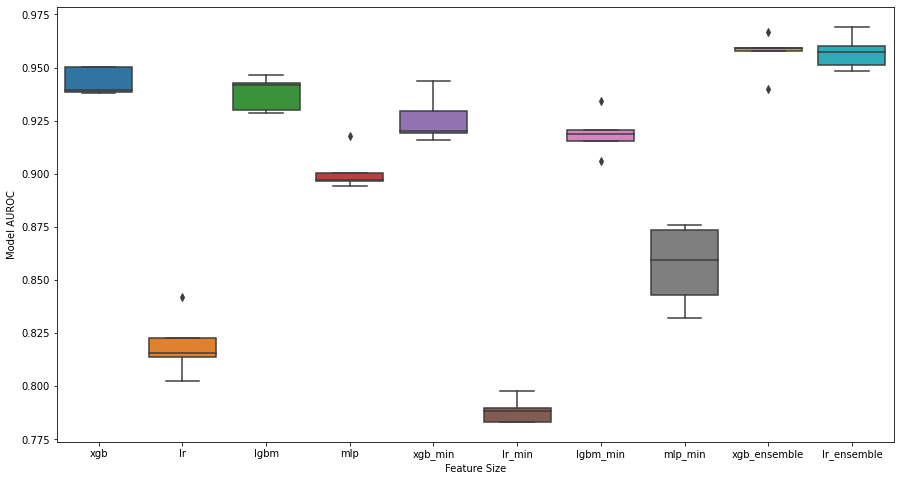

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=roc_auc_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')

### Plot F1

[Text(0, 0.5, 'Model F1')]

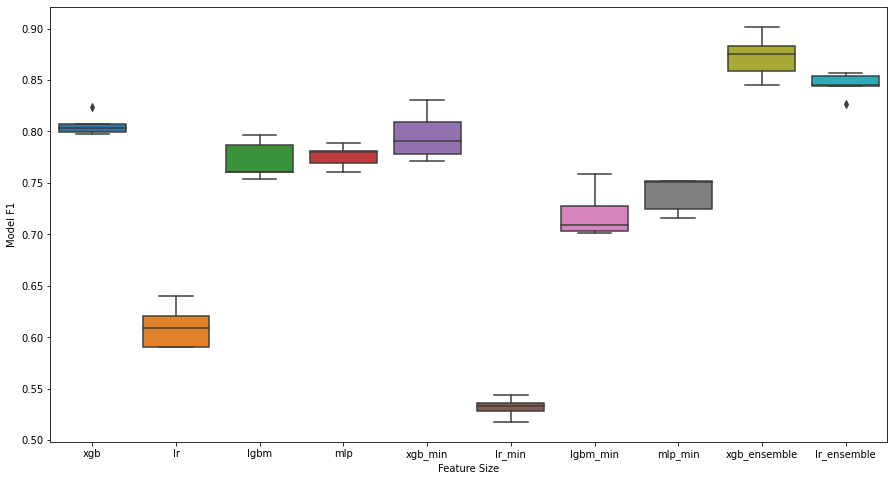

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=f1_scores)
ax.set(xticklabels=labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model F1')

## Read SFS file

In [38]:
import pickle

with open('data/sfs.pickle', 'rb') as fp:
    sfs = pickle.load(fp)

In [39]:
sfs

{1: {'feature_idx': (89,),
  'cv_scores': array([0.89795918, 0.88247713, 0.87605634, 0.87957746, 0.86690141]),
  'avg_score': 0.8805943047447246,
  'feature_names': ('gcs_motor_last',)},
 2: {'feature_idx': (1, 89),
  'cv_scores': array([0.92258973, 0.91836735, 0.91830986, 0.90352113, 0.9       ]),
  'avg_score': 0.9125576116799319,
  'feature_names': ('visit_duration_hrs', 'gcs_motor_last')},
 3: {'feature_idx': (1, 89, 131),
  'cv_scores': array([0.91625616, 0.92047854, 0.92394366, 0.92253521, 0.91126761]),
  'avg_score': 0.9188962345501581,
  'feature_names': ('visit_duration_hrs',
   'gcs_motor_last',
   'bicarbonate_last')},
 4: {'feature_idx': (1, 30, 89, 131),
  'cv_scores': array([0.9078114 , 0.91907108, 0.92394366, 0.92323944, 0.91619718]),
  'avg_score': 0.9180525517637846,
  'feature_names': ('visit_duration_hrs',
   'gcs_verbal_min',
   'gcs_motor_last',
   'bicarbonate_last')},
 5: {'feature_idx': (1, 14, 31, 89, 131),
  'cv_scores': array([0.92047854, 0.921886  , 0.926760